In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad 
from scipy.optimize import minimize,brute
from random import choices

In [62]:
def cos_sq(x):
    return np.cos(x)**2



In [92]:
def f_max(func,range,*args):
        minus_f= lambda x: -func(x,*args)
        x0= brute(minus_f,[range])[0]
        x0= minimize(minus_f,x0).x[0]
        return func(x0)

def accept_reject(func,range,fmax,size,*args):
        samples= []
        i=0

        while len(samples)<size:
                x= np.random.uniform(*range)
                f_val= func(x,*args)
                accept= choices([True,False],[f_val/fmax,1-f_val/fmax])[0]
                #f_rand= np.random.uniform(0,fmax)
                #if f_rand < f_val :
                if accept:
                        samples.append(x)
                
                i+=1
        
        print(f"Found {len(samples)} samples in {i} iterations")

        
        return samples

        



In [93]:
fmax= f_max(cos_sq,(-1,3))
xs= accept_reject(cos_sq,(-1,3),fmax,100000)

Found 1000000 samples in 1852834 iterations


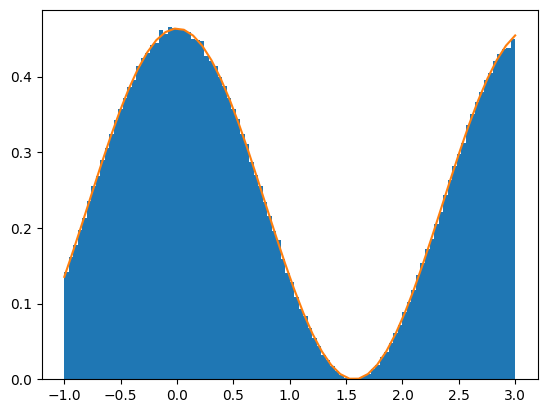

In [95]:
ps= np.linspace(-1,3)
plt.hist(xs,bins=100,density=True)
plt.plot(ps, cos_sq(ps)/quad(cos_sq,-1,3)[0])
plt.show()